In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras import datasets, layers, models,initializers

In [1]:
# Import tensorflow y lo necesario para hacer nuestra CNN

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,initializers

In [2]:
# importamos google drive para acceder a los datos
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
# importamos datos de los directporios utilizando imagedatagenerator
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# cargamos los directorios
traindata = ImageDataGenerator()
train_images = traindata.flow_from_directory(
    directory='./train',
    target_size=(160,160),
    class_mode='categorical'
)
testdata = ImageDataGenerator()
test_images = testdata.flow_from_directory(
    directory='./validate',
    target_size=(160,160),
    class_mode='categorical'
)

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


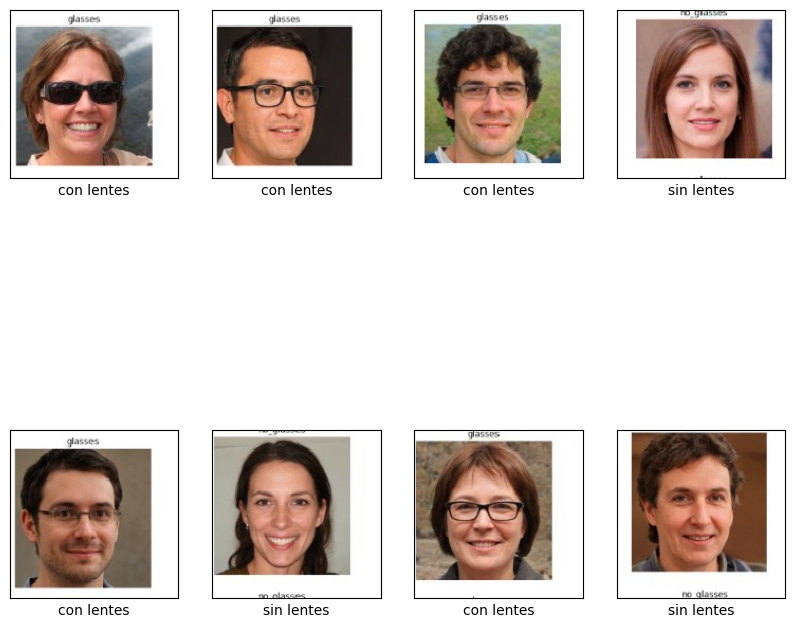

In [9]:
# Definimos las clases
class_names = ['con lentes', 'sin lentes']
plt.figure(figsize=(10,10))

# Obtener un lote de imágenes y etiquetas
images, labels = next(train_images)

for i in range(8):  # Asumiendo que quieres visualizar 8 imágenes
    plt.subplot(2, 4, i + 1)  # Ajusta el subplot para 8 imágenes
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].astype('uint8'))  # Conversión para visualización correcta
    plt.xlabel(class_names[np.argmax(labels[i])])  # Asumiendo que las etiquetas están en formato categórico

plt.show()


In [11]:
# importamos librerias
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Preparamos el modelo de la red neuronal convolucional (CNN)

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

c:\Users\juan.cadena\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# vemos el modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 64)     │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# agregamos capas dense y flatten
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))



In [15]:
# vemos el modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       165,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,210 (868.01 KB)

 Trainable params: 222,210 (868.01 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#compilamos y entrenamos el modelo

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



history = model.fit(train_images , epochs=10, validation_data=(test_images))

Epoch 1/10


c:\Users\juan.cadena\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.5582 - loss: 319.8838 - val_accuracy: 0.5000 - val_loss: 115.0163
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5664 - loss: 72.2472 - val_accuracy: 0.5000 - val_loss: 19.6068
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5198 - loss: 13.2274 - val_accuracy: 0.4750 - val_loss: 2.4770
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.7841 - loss: 1.5561 - val_accuracy: 0.5500 - val_loss: 5.1394
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.8632 - loss: 0.7471 - val_accuracy: 0.6750 - val_loss: 1.1819
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9307 - loss: 0.1552 - val_accuracy: 0.7750 - val_loss: 0.5981
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.9335 - loss: 0.1569 - val_accuracy: 0.6500 - val_loss: 0.7422
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9599 - loss: 0.1226 - val_accuracy: 0.5750 - val_loss: 0.8

In [17]:
#print(len(history.history['accuracy']))

#print(len(history.history['acc']))
print(history.history['accuracy'])

print(history.history['val_accuracy'])

[0.5192307829856873, 0.5384615659713745, 0.5096153616905212, 0.7884615659713745, 0.8846153616905212, 0.9230769276618958, 0.9230769276618958, 0.9519230723381042, 0.9903846383094788, 0.9807692170143127]
[0.5, 0.5, 0.4749999940395355, 0.550000011920929, 0.675000011920929, 0.7749999761581421, 0.6499999761581421, 0.574999988079071, 0.6000000238418579, 0.574999988079071]


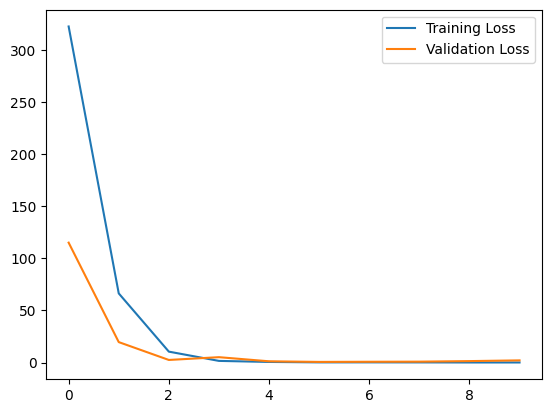

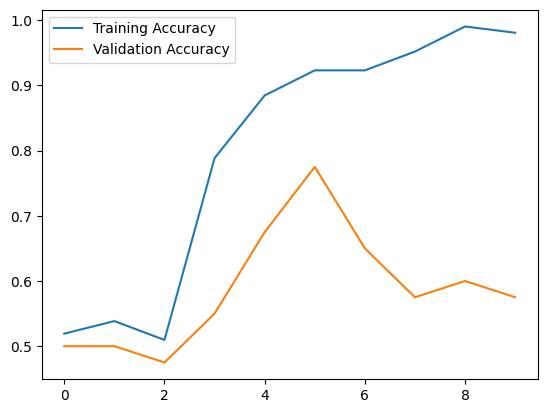

In [20]:
# Visualización de curvas de pérdida y precisión
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

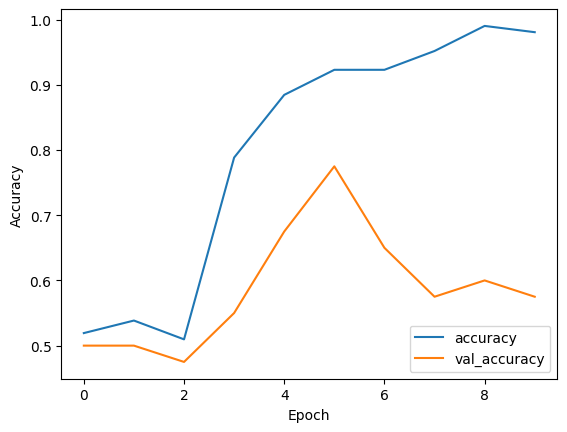

In [21]:
#Evaluamos el modelo y visualizamos la precisión a lo largo de las épocas

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [30]:
#guardamos el modelo
model.save("pruebas.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
glasses


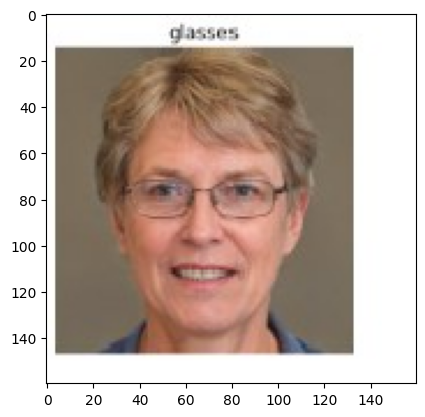

In [37]:
#Cargamos una imagen de prueba y la mostramos
from keras.preprocessing import image
img = image.load_img("./test/row-1-column-6.jpg",target_size=(160,160))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model

# Cargamos el modelo guardado
saved_model = load_model("pruebas.h5")

# Realizamos la predicción sobre la imagen de prueba
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("glasses")
else:
    print('no-glasses')